In [1]:
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D, Conv2D, Flatten, Dense
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras import backend as K
from keras import initializers
import keras

import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from os import system
import os
import random

import imageio

Using Theano backend.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [186]:
averaging_kernel_weight_9x9 = 1./81
averaging_kernel_weight_5x5 = 1./25
averaging_kernel_weight_3x3 = 1./9

image = imageio.imread("./images/briefs_gray.bmp")
patch_size = 56  # default value of PATCH_SIZE in https://github.com/opencv/opencv_contrib/blob/master/modules/xfeatures2d/src/brief.cpp
patch = image[96: 96 + patch_size, 68: 68 + patch_size]
patch_with_chnl_dim = np.expand_dims(patch, axis=-1)
print(patch_with_chnl_dim.shape)
patches = np.expand_dims(patch_with_chnl_dim, axis=0)
print(patches.shape)

(56, 56, 1)
(1, 56, 56, 1)


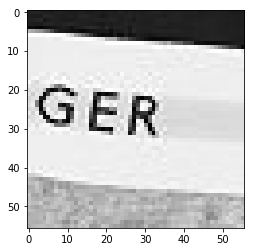

In [58]:
plt.imshow(patch, cmap='gray')

In [170]:
input_shape = (patch_size, patch_size, 1)
input_img = Input(shape=input_shape)

average_blurred = Conv2D(1, (9, 9), activation="relu", padding="valid", kernel_initializer=initializers.Constant(averaging_kernel_weight_9x9), bias_initializer=keras.initializers.Zeros(), trainable=False)(input_img)

blurrer = Model(input_img, average_blurred)

blurrer.compile(optimizer='adadelta', loss="binary_crossentropy")
blurrer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 56, 56, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 1)         82        
Total params: 82
Trainable params: 0
Non-trainable params: 82
_________________________________________________________________


In [176]:
input_shape = (patch_size, patch_size, 1)
input_img = Input(shape=input_shape)

x = Conv2D(1, (5,5), activation="relu", padding="valid", kernel_initializer=initializers.Constant(averaging_kernel_weight_5x5), bias_initializer=keras.initializers.Zeros(), trainable=False)(input_img)
average_blurred = Conv2D(1, (5,5), activation="relu", padding="valid", kernel_initializer=initializers.Constant(averaging_kernel_weight_5x5), bias_initializer=keras.initializers.Zeros(), trainable=False)(x)

blurrer_2conv = Model(input_img, average_blurred)

blurrer_2conv.compile(optimizer='adadelta', loss="binary_crossentropy")
blurrer_2conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 56, 56, 1)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 52, 52, 1)         26        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 48, 48, 1)         26        
Total params: 52
Trainable params: 0
Non-trainable params: 52
_________________________________________________________________


In [187]:
input_shape = (patch_size, patch_size, 1)
input_img = Input(shape=input_shape)

x = Conv2D(1, (3,3), activation="relu", padding="valid", kernel_initializer=initializers.Constant(averaging_kernel_weight_3x3), bias_initializer=keras.initializers.Zeros(), trainable=False)(input_img)
x = Conv2D(1, (3, 3), activation="relu", padding="valid", kernel_initializer=initializers.Constant(averaging_kernel_weight_3x3), bias_initializer=keras.initializers.Zeros(), trainable=False)(x)
x = Conv2D(1, (3, 3), activation="relu", padding="valid", kernel_initializer=initializers.Constant(averaging_kernel_weight_3x3), bias_initializer=keras.initializers.Zeros(), trainable=False)(x)
average_blurred = Conv2D(1, (3, 3), activation="relu", padding="valid", kernel_initializer=initializers.Constant(averaging_kernel_weight_3x3), bias_initializer=keras.initializers.Zeros(), trainable=False)(x)

blurrer_4conv = Model(input_img, average_blurred)

blurrer_4conv.compile(optimizer='adadelta', loss="binary_crossentropy")
blurrer_4conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 56, 56, 1)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 54, 54, 1)         10        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 52, 52, 1)         10        
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 50, 50, 1)         10        
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 48, 48, 1)         10        
Total params: 40
Trainable params: 0
Non-trainable params: 40
_________________________________________________________________


(48, 48)


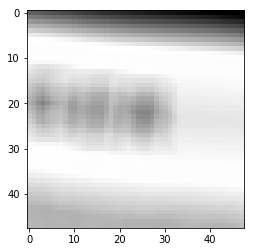

In [177]:
patch_blurred = blurrer.predict(patches)[0, :, :, 0]
print(patch_blurred.shape)
plt.imshow(patch_blurred, cmap='gray')
plt.show()

(48, 48)


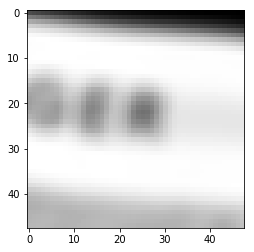

In [178]:
patch_blurred = blurrer_2conv.predict(patches)[0, :, :, 0]
print(patch_blurred.shape)
plt.imshow(patch_blurred, cmap='gray')
plt.show()

(48, 48)


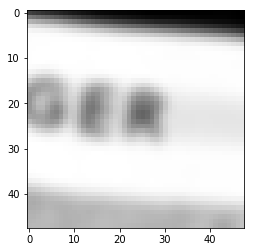

In [188]:
patch_blurred = blurrer_4conv.predict(patches)[0, :, :, 0]
print(patch_blurred.shape)
plt.imshow(patch_blurred, cmap='gray')
plt.show()

In [206]:
type(patch_blurred[0,0])

numpy.float32

In [207]:
patch_blurred[0,0]

85.38135

In [201]:
file = open('./opencv_test_points/generated_64.txt', 'r') 
count = 0

x_coord = 0
y_coord = 0

while True:
    line = file.readline()
    if not line: 
        break
    
    x_coord_prev = x_coord
    y_coord_prev = y_coord
    
    x_coord = int(line[1: line.find(",")])
    y_coord = int(line[line.find(",") + 1: -2])
  
    if count % 2 == 1:
#         print(x_coord_prev, y_coord_prev, "       ", x_coord, y_coord)
        if patch_blurred[x_coord_prev, y_coord_prev] < patch_blurred[x_coord, y_coord]:
            print("1", end=',')
        else:
            print("0", end=',')
        
        
    count += 1
file.close()

1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,0,0,1,1,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1,1,1,0,1,1,1,1,0,0,0,1,0,0,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,0,1,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,1,1,1,0,0,0,1,0,1,0,0,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,1,1,0,1,0,1,1,1,1,0,1,0,0,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,1,1,1,0,1,1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,1,1,0,0,1,1,0,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0,1,1,0,1,0,1,1,1,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,

In [111]:
count

1024

In [137]:
# 1 conv 9x9
descr1 = np.array([0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,1,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,1,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1,0,1,0,1,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,1,1,0,1,0,1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,0,0,1,0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,1,0,1,1,1,1,0,1,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1], dtype=np.uint8)
descr2 = np.array([0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,0,1,1,1,0,1,0,1,1,0,0,0,1,1,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,1,1,1,1,0,0,1,1,1,1,1,0,1,0,0,1,0,0,0,1,0,1,1,1,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,1,1,0,0,1,1,0,0,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0,1,0,1,0,0,0,1,1,1,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,1,1,1,0,1,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1,1,1,0,1,0,1,1,1,1,0,1,0,0,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,1,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,0,1,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,1,1,0,1,0,0], dtype=np.uint8)

In [181]:
# 2 conv 5x5
descr3 = np.array([1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,0,0,1,1,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1,1,1,0,1,1,1,1,0,0,0,1,0,0,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,0,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0,1,0,1,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,1,1,1,0,1,1,0,1,0,1,1,1,1,0,0,1,1,0,1,0,0,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,1,1,0,1,0,1,1,1,1,0,1,0,0,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,1,1,0,0,1,1,0,0,0,0,1,1,1,1,1,0,1,0,0,1,1,0,1,1,0,1,0,1,1,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,1,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,1,0,0], dtype=np.uint8)
descr4 = np.array([0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,1,1,1,0,1,1,0,1,1,1,0,0,1,0,0,1,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,1,1,0,1,1,1,0,1,1,1,1,0,1,1,1,0,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,1,1,0,1,1,1,0,0,0,1,0,1,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,0,1,0,0,1,1,1,0,0,0,0,1,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,1,1,1,1,0,1,1,1,0,0,0,0,1,1,0,1,0,1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,1,0,0,1,1,1,1,1,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,1,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1], dtype=np.uint8)

In [193]:
# 4 conv 3x3
descr5 = np.array([1,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,0,0,1,1,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1,1,1,0,1,1,1,1,0,0,0,1,0,0,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,0,1,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,1,1,1,1,0,1,1,0,1,0,1,1,1,1,0,0,0,1,0,1,0,0,1,1,1,1,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,1,1,0,1,0,1,1,1,1,0,1,0,0,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,1,1,1,0,1,1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,1,1,0,0,1,1,0,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0,1,1,0,1,0,1,1,1,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,1,1,1,0,1,0,0], dtype=np.uint8)
descr6 = np.array([0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,1,1,1,1,0,1,1,0,1,1,1,0,0,1,0,0,1,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,1,1,0,1,1,1,0,0,0,1,0,1,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,0,1,0,0,1,1,1,0,0,0,0,1,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,1,1,1,1,0,1,1,1,0,0,0,0,1,1,0,1,0,1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,1,1,0,0,1,0,0,1,1,1,1,1,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,1,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1], dtype=np.uint8)

In [200]:
print(np.count_nonzero(descr1 - descr3))
print(np.count_nonzero(descr1 - descr5))
print(np.count_nonzero(descr3 - descr5))
print()
print(np.count_nonzero(descr2 - descr4))
print(np.count_nonzero(descr2 - descr6))
print(np.count_nonzero(descr4 - descr6))

27
42
17

37
50
13


In [138]:
temp_descr1 = np.array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0], dtype=np.uint8)

temp_descr2 = np.array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0], dtype=np.uint8)


In [202]:
diff = descr5 - temp_descr1
# diff = descr1 - temp_descr2
# diff = descr2 - temp_descr1
# diff = descr2 - temp_descr2

In [203]:
diff

array([  0, 255,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   1,   1,   0,   0,   0,   1,   0, 255,   0,   0,   0,   0,
         1,   0,   0,   0,   1,   0,   0, 255,   0,   0,   0, 255,   1,
         1,   0,   0, 255,   0,   0,   0,   0,   0,   0, 255,   0,   0,
         0,   0,   1,   1,   0,   1,   1,   0,   0,   1,   0, 255,   0,
         0,   0, 255, 255, 255,   0,   0, 255,   0,   0,   0, 255, 255,
         1, 255,   0,   1, 255,   1,   0,   0,   0,   0,   0,   0,   0,
       255,   1,   0,   0,   1,   0,   0,   0,   0,   0,   1,   1,   0,
         0, 255,   0, 255,   0,   1,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0,   0,   0,   0,   0,   1,   0,   1, 255,
         0,   0,   0,   1,   0, 255,   0,   0, 255, 255,   0, 255,   0,
         0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   1, 255,
         1,   0,   0,   0,   1,   1,   0,   0,   0,   0, 255,   0,   0,
         0,   1,   0,   0,   0, 255, 255, 255,   0,   0,   0, 25

In [148]:
np.count_nonzero(diff)

166

In [151]:
np.count_nonzero(diff)

155

In [154]:
np.count_nonzero(diff)

265

In [157]:
np.count_nonzero(diff)

260

In [204]:
np.count_nonzero(diff)

178

In [275]:
toy_weights = np.array([1,2,3,4,5,6]).reshape(3,2)

toy_input = Input(shape=(3,))

# toy_output = Dense(2, activation="sigmoid", kernel_initializer=initializers.Constant(1.0), bias_initializer=keras.initializers.Zeros(), trainable=False)(toy_input)
toy_output = Dense(2, activation="linear", weights=[toy_weights, np.zeros(2)], trainable=False)(toy_input)



toy_model = Model(toy_input, toy_output)

toy_model.compile(optimizer='adadelta', loss="binary_crossentropy")
toy_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        (None, 3)                 0         
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 8         
Total params: 8
Trainable params: 0
Non-trainable params: 8
_________________________________________________________________


In [279]:
toy = np.array([10, 100, 1000])
# toy_with_chnl_dim = np.expand_dims(patch, axis=-1)
toys = np.expand_dims(toy, axis=0)
toy_preditction = toy_model.predict(toys)
print(toy_preditction)

[[5310. 6420.]]


In [278]:
toy_model.get_layer(index=1).get_weights()

[array([[1., 2.],
        [3., 4.],
        [5., 6.]], dtype=float32), array([0., 0.], dtype=float32)]

In [267]:
toy_weights = np.zeros((3,2))
toy_weights[0,0] = 1
toy_weights[1,0] = -1
toy_weights[0,1] = 1
toy_weights[2,1] = -1

print(toy_weights)

[[ 1.  1.]
 [-1.  0.]
 [ 0. -1.]]
